In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv(r'C:\Users\Javi\Documents\GitHub\Eda_regression\data\Yeast\yeast.data', delim_whitespace=True)


In [47]:
columns = ['sequence_name', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'class_distr']

In [48]:
df.columns

Index(['ADT1_YEAST', '0.58', '0.61', '0.47', '0.13', '0.50', '0.00', '0.48',
       '0.22', 'MIT'],
      dtype='object')

In [49]:
df.columns = columns

In [50]:
df

,sequence_name,mcg,gvh,alm,mit,erl,pox,vac,nuc,class_distr
0,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
1,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
2,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
3,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
4,AATC_YEAST,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,CYT
...,...,...,...,...,...,...,...,...,...,...
1478,YUR1_YEAST,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22,ME2
1479,ZIP1_YEAST,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47,NUC
1480,ZNRP_YEAST,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22,ME2
1481,ZUO1_YEAST,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39,NUC


In [100]:
df.describe()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,class_distr_cod
count,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000,1483.000000
mean,0.500067,0.499858,0.500054,0.176052,0.167312,0.001314,1.176393,0.144327,4.124747
std,0.137330,0.123933,0.086696,0.059543,0.002941,0.013017,0.235240,0.023869,3.038209
min,0.110000,0.130000,0.210000,0.000000,0.167025,0.000000,0.000000,0.000000,0.000000
25%,0.410000,0.420000,0.460000,0.134743,0.167025,0.000000,1.070580,0.131012,0.000000
50%,0.490000,0.490000,0.510000,0.164069,0.167025,0.000000,1.201795,0.131012,5.000000
75%,0.580000,0.570000,0.550000,0.213039,0.167025,0.000000,1.295895,0.155162,7.000000
max,1.000000,1.000000,1.000000,0.375000,0.197433,0.133060,2.607291,0.235537,9.000000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sequence_name  1483 non-null   object 
 1   mcg            1483 non-null   float64
 2   gvh            1483 non-null   float64
 3   alm            1483 non-null   float64
 4   mit            1483 non-null   float64
 5   erl            1483 non-null   float64
 6   pox            1483 non-null   float64
 7   vac            1483 non-null   float64
 8   nuc            1483 non-null   float64
 9   class_distr    1483 non-null   object 
dtypes: float64(8), object(2)
memory usage: 116.0+ KB


In [51]:
df['class_distr'].value_counts()


class_distr
CYT    463
NUC    429
MIT    243
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: count, dtype: int64

In [92]:
df_corr = df.corr(method = 'pearson', numeric_only=True)

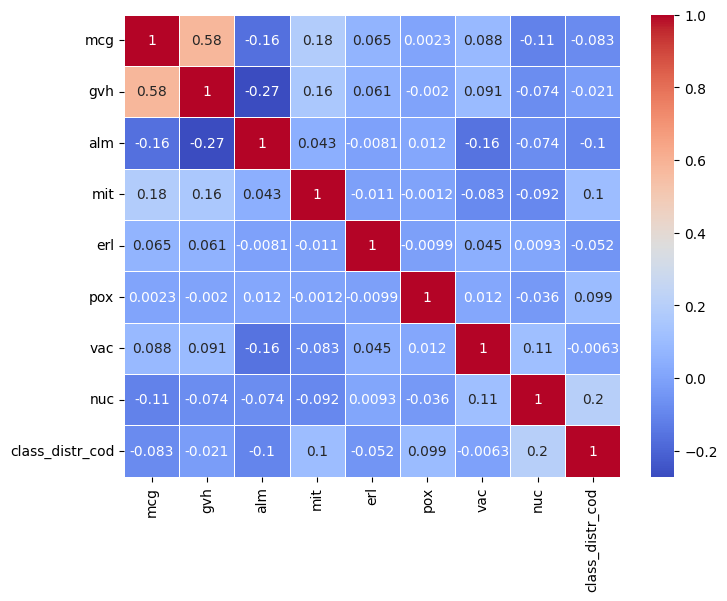

In [93]:
plt.figure(figsize=(8, 6))  # Establecer el tamaño deseado (ancho x alto)
g = sns.heatmap(df_corr,annot=True, cmap='coolwarm', linewidths=0.5)

plt.show()


In [57]:
class_count = df['class_distr'].value_counts()

In [59]:
class_count

class_distr
CYT    463
NUC    429
MIT    243
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: count, dtype: int64

<Axes: xlabel='erl', ylabel='Count'>

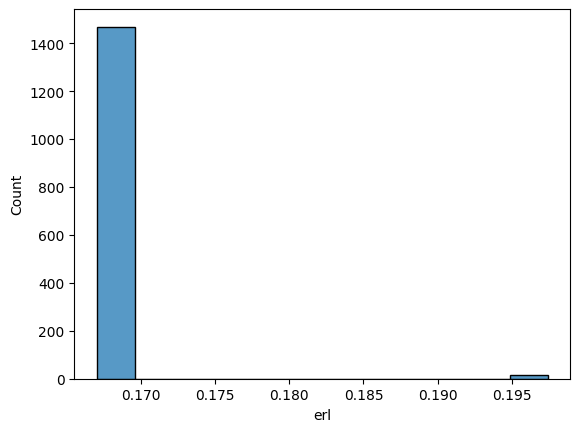

In [101]:
sns.histplot(df, x = 'erl')

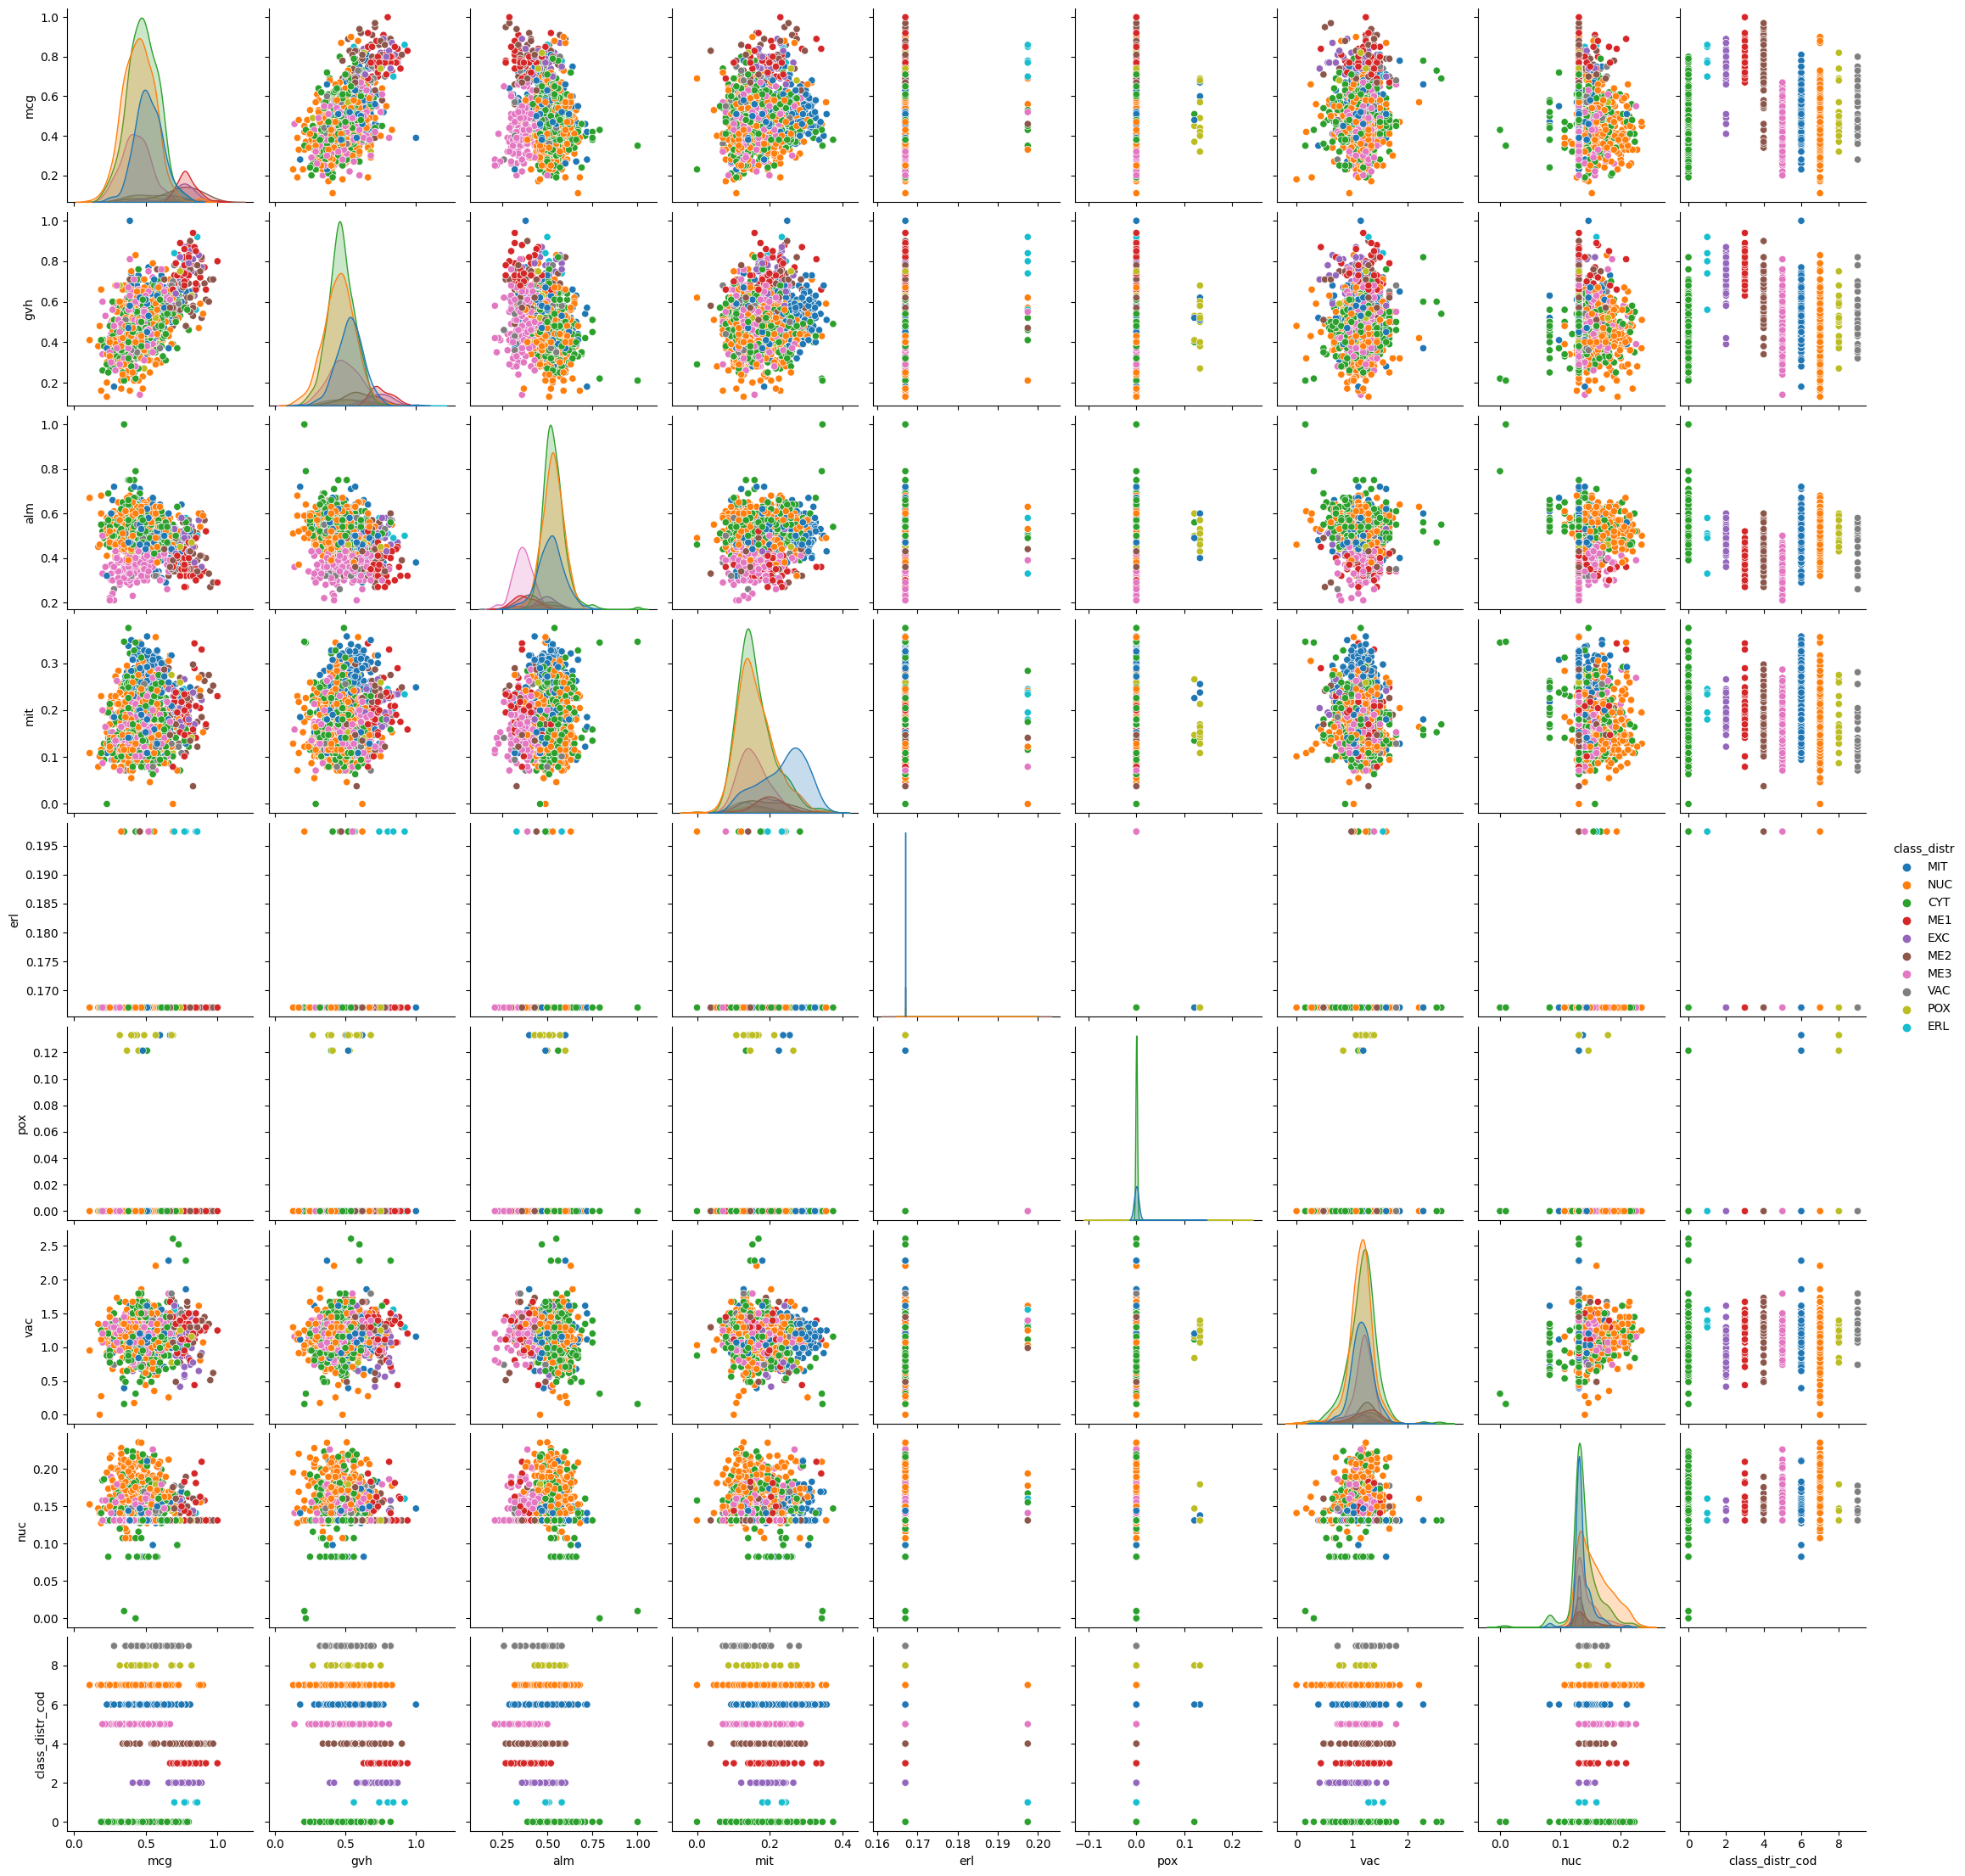

In [95]:
sns.pairplot(df, hue='class_distr')

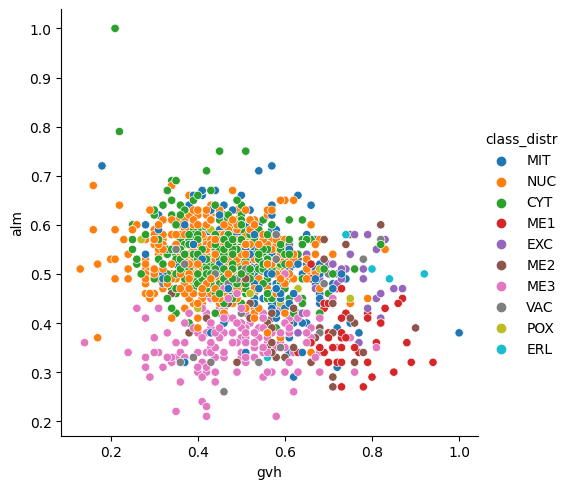

In [99]:
g = sns.relplot(data = df, x = 'gvh', y = 'alm', hue='class_distr')


In [79]:
from scipy import stats

#Esto nos dice si se distribuye hacia la derecha o izquierda lada variable

numeric_vars = ['mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc']
# Check the skew of all numerical features
skewed_feats = df.loc[:,numeric_vars].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
print(skewness.head())

          Skew
erl  10.145842
pox   9.814940
mit   0.646474
nuc   0.615372
mcg   0.604728


In [78]:
from scipy.special import boxcox1p #Librería

skewness = skewness.loc[abs(skewness.Skew) > 0.75,:] #Filtramos los que tengan un índice superior a .75
lambda_values = pd.Series(np.linspace(-2,2,40)) #Asignamos candidatos a índices de transformación
for var in skewness.index:
    skews = [stats.skew(boxcox1p(df[var], lam)) for lam in lambda_values]
    lam = lambda_values[pd.Series(np.abs(skews)).idxmin()] #Elegimos el índice óptimo
    df[var] = boxcox1p(df[var], lam)

In [85]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['class_distr_cod'] = le.fit_transform(df['class_distr'])


In [89]:
df['class_distr_cod'].value_counts()

class_distr_cod
0    463
7    429
6    243
5    163
4     51
3     44
2     35
9     30
8     20
1      5
Name: count, dtype: int64